In [4]:
# install rosbag for python3
!pip3 install bagpy

     |████████████████████████████████| 2.0 MB 5.7 MB/s 
     |████████████████████████████████| 603 kB 43.8 MB/s 
     |████████████████████████████████| 216 kB 44.7 MB/s 
     |████████████████████████████████| 90 kB 9.2 MB/s 
     |████████████████████████████████| 3.7 MB 36.5 MB/s 
     |████████████████████████████████| 1.2 MB 44.3 MB/s 
     |████████████████████████████████| 2.8 MB 29.3 MB/s 
     |████████████████████████████████| 1.1 MB 44.7 MB/s 
     |████████████████████████████████| 2.9 MB 31.5 MB/s 
     |████████████████████████████████| 90 kB 9.4 MB/s 
     |████████████████████████████████| 121 kB 44.1 MB/s 
     |████████████████████████████████| 100 kB 8.7 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 100 kB 9.7 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 
     |████████████████████████████████| 1.7 MB 35.8 MB/s 
     |█████████████████████

In [10]:
#download bagfile from github
!wget https://github.com/Dr-Qiu-s-research-team/UAV_data_repository/raw/main/rosbag/11_17_vicon.bag

--2022-04-05 02:17:54--  https://github.com/Dr-Qiu-s-research-team/UAV_data_repository/raw/main/rosbag/11_17_vicon.bag
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dr-Qiu-s-research-team/UAV_data_repository/main/rosbag/11_17_vicon.bag [following]
--2022-04-05 02:17:55--  https://raw.githubusercontent.com/Dr-Qiu-s-research-team/UAV_data_repository/main/rosbag/11_17_vicon.bag
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430933 (421K) [application/octet-stream]
Saving to: ‘11_17_vicon.bag’

11_17_vicon.bag     100%[===================>] 420.83K  --.-KB/s    in 0.04s   

2022-04-05 02:17:55 (9

No handles with labels found to put in legend.


path:        /content/11_17_vicon.bag
version:     2.0
duration:    1:48s (108s)
start:       Nov 17 2020 17:25:59.71 (1605633959.71)
end:         Nov 17 2020 17:27:47.82 (1605634067.82)
size:        420.8 KB
messages:    3136
compression: none [1/1 chunks]
types:       geometry_msgs/PoseStamped [d3812c3cbc69362b77dc0b19b345f8f5]
topics:      /vrpn_client_node/kritt/pose   3136 msgs @ 33.3 Hz : geometry_msgs/PoseStamped



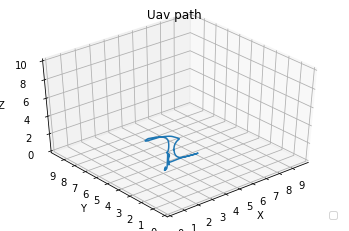

In [11]:
import rosbag
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

def plot_env(data):
        fig = pyplot.figure()
        ax = fig.gca(projection='3d')
        ax.set_zlabel('Z', color='k')
        ax.set_ylabel('Y', color='k')
        ax.set_xlabel('X', color='k')
        ax.set_xlim(0, 10)
        ax.set_xticks(np.arange(0,10,1))
        ax.set_ylim(0, 10)
        ax.set_yticks(np.arange(0,10,1))
        ax.set_zlim(0, 10)
        ax.set_title('Uav path')
        ax.legend(loc='lower right')

        ax.plot(data[0],data[1],data[2])

        ax.view_init(40, -130)
        pyplot.show()


def main():
    bag = rosbag.Bag('/content/11_17_vicon.bag','r')
    print(bag,end='\n\n')
    box = bag.read_messages(topics='/vrpn_client_node/kritt/pose')
    x,y,z=[],[],[]
    for i in box:
        x.append(i[1].pose.position.x+5)
        y.append(i[1].pose.position.y+5)
        z.append(i[1].pose.position.z)

    plot_env([x,y,z])

if __name__ == '__main__':
    main()